In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
globalCo2 = pd.read_csv("/content/gdrive/My Drive/Copie de _grx5 C02 global.xlsx - Feuille 1.csv")
temp = pd.read_csv("/content/gdrive/My Drive/exportMergeTempEarthGlobal.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
globalCo2.head(5)


Year  Total CO2 Emissions  (MtCO2)
0  1850                           198
1  1851                           198
2  1852                           209
3  1853                           216
4  1854                           253

In [0]:
temp.head(4)

dates  AverageTemperature
0   1743            5.184140
1   1744            9.837898
2   1745            1.387125
3   1750            9.129353

In [0]:
globalCo2.shape

(163, 2)

In [0]:
temp.shape

(267, 2)

In [0]:
globalCo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Year                          163 non-null    int64
 1   Total CO2 Emissions  (MtCO2)  163 non-null    int64
dtypes: int64(2)
memory usage: 2.7 KB


In [0]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dates               267 non-null    int64  
 1   AverageTemperature  267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [5]:
globalCo2= globalCo2.rename(columns={'Year':'dates'})
globalCo2.head(5)

dates  Total CO2 Emissions  (MtCO2)
0   1850                           198
1   1851                           198
2   1852                           209
3   1853                           216
4   1854                           253

In [6]:
df_mergeCO2 =globalCo2.merge(temp, how='inner')

df_mergeCO2.head(5)

dates  Total CO2 Emissions  (MtCO2)  AverageTemperature
0   1850                           198           16.907766
1   1851                           198           16.761938
2   1852                           209           15.926416
3   1853                           216           16.140916
4   1854                           253           16.255743

In [0]:
pd.isnull(df_mergeCO2).sum()

dates                           0
Total CO2 Emissions  (MtCO2)    0
AverageTemperature              0
dtype: int64

In [0]:
df_mergeCO2.isna().sum()

dates                           0
Total CO2 Emissions  (MtCO2)    0
AverageTemperature              0
dtype: int64

In [0]:
df_mergeCO2.dropna(how='all',inplace= True) # pas besoin ici

In [0]:
df_mergeCO2.describe()

dates  Total CO2 Emissions  (MtCO2)  AverageTemperature
count   163.000000                    163.000000          163.000000
mean   1931.000000                   8388.533742           18.398457
std      47.198164                   9284.269577            0.810682
min    1850.000000                    198.000000           15.926416
25%    1890.500000                   1330.000000           18.161938
50%    1931.000000                   3759.000000           18.605819
75%    1971.500000                  14818.000000           18.861861
max    2012.000000                  33843.000000           19.629806

In [0]:
print(df_mergeCO2.columns)

Index(['dates', 'Total CO2 Emissions  (MtCO2)', 'AverageTemperature'], dtype='object')


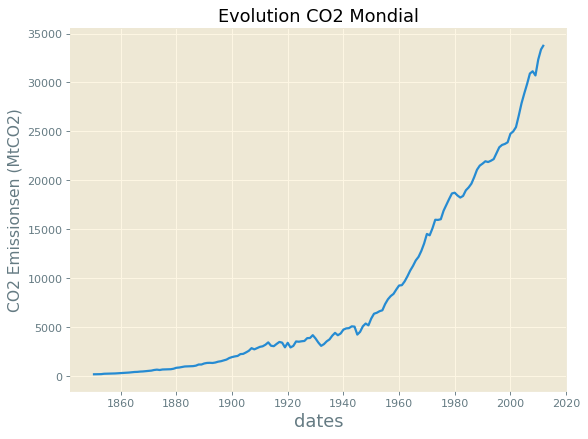

In [0]:
import matplotlib.pyplot as plt
from pylab import *
figure(figsize=(8,6), dpi=80)

with plt.style.context('Solarize_Light2'):
  plt.plot(df_mergeCO2.dates, df_mergeCO2['Total CO2 Emissions  (MtCO2)'])
  plt.title('Evolution CO2 Mondial')
  plt.xlabel('dates', fontsize=16)
  plt.ylabel('CO2 Emissionsen (MtCO2)', fontsize=14)
 

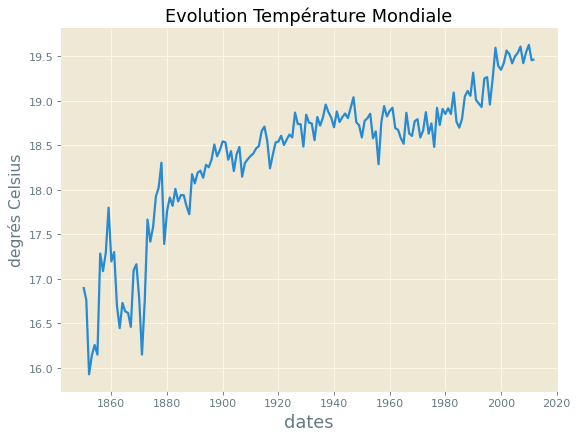

In [0]:
import matplotlib.pyplot as plt
figure(figsize=(8,6), dpi=80)
with plt.style.context('Solarize_Light2'):
  plt.plot(df_mergeCO2.dates, df_mergeCO2['AverageTemperature'])
  plt.title('Evolution Température Mondiale')
  plt.xlabel('dates', fontsize=16)
  plt.ylabel('degrés Celsius', fontsize=14)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_mergeCO2.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

Text(0.5, 1.0, 'Temperature Moyenne en fonction de la concentration en CO2')

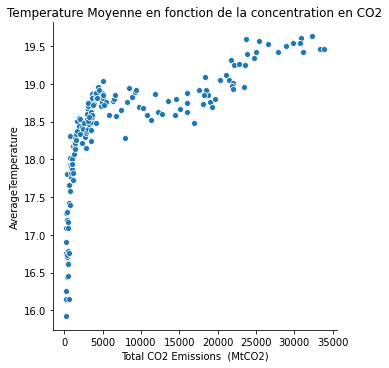

In [9]:
import seaborn as sns

sns.relplot(x='Total CO2 Emissions  (MtCO2)', y='AverageTemperature', data=df_mergeCO2)
plt.title('Temperature Moyenne en fonction de la concentration en CO2')

In [0]:
Xaxis = df_mergeCO2['Total CO2 Emissions  (MtCO2)'] 
Yaxis = df_mergeCO2['AverageTemperature']

In [0]:
# NumPy can find the coefficients of the linear regression

# First of all, you have to define 2 series :
# X-axis : the most correlated column, that you found above
Xaxis = df_mergeCO2['Total CO2 Emissions  (MtCO2)'] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Yaxis = df_mergeCO2['AverageTemperature']

In [0]:
# Then, NumPy calculate automatically coefficient. You just have to execute this code.

model = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)


print("What's the type of this model ?, ", type(model))
print("What's inside ?, ", model)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(model[0], 1) ," * x  +  ", round(model[1], 1) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [6.00872955e-05 1.78944125e+01]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.0  * x  +   17.9


In [0]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 21.

# Hand calculation :
print("By hand :", model[0] * 25000 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(model)(25000)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [20000, 30000, 45000]
print("NumPy list of values :  ", np.poly1d(model)(listtest)   )

By hand : 19.396594841446916
NumPy :   19.396594841446916
NumPy list of values :   [19.09615836 19.69703132 20.59834075]


In [0]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()             # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)

In [0]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis

plt.scatter(array, np.poly1d(model)(array), c='blue')
plt.plot(array, np.poly1d(model)(array), c='red')
plt.show()

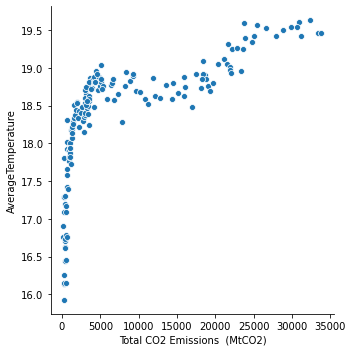

In [0]:
# Hop !
import seaborn as sns

sns.relplot(x='Total CO2 Emissions  (MtCO2)', y='AverageTemperature', data=df_mergeCO2)

In [0]:
Xaxis = df_mergeCO2['Total CO2 Emissions  (MtCO2)'] 
Yaxis = df_mergeCO2['AverageTemperature']

In [14]:
# Then, NumPy calculate automatically coefficient. You just have to execute this code.

polymodel = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)


print("What's the type of this model ?, ", type(polymodel))
print("What's inside ?, ", polymodel)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(polymodel[0], 1) ," * x  +  ", round(polymodel[1], 1) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [6.00872955e-05 1.78944125e+01]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.0  * x  +   17.9


In [15]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 25000.

# Hand calculation :
print("By hand :", polymodel[0] * 25000 + polymodel[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(25000)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [5000, 20000, 35000]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest)   )

By hand : 19.396594841446916
NumPy :   19.396594841446916
NumPy list of values :   [18.19484893 19.09615836 19.9974678 ]


In [0]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()             # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)

In [19]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis
import matplotlib.pyplot as plt

with plt.style.context('Solarize_Light2'):
  sns.relplot(x='Total CO2 Emissions  (MtCO2)', y='AverageTemperature', data=df_mergeCO2)
  plt.plot(array, np.poly1d(polymodel)(array), c='red')
  plt.title('Temperature Moyenne en fonction de la quantité en CO2')
  plt.show()

In [0]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 20000.

# Hand calculation :
print("By hand :", model[0] * 20000 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(20000))

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [5000, 10000, 20000,40000, 50000, 60000]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest)   )

By hand : 19.096158364097267
NumPy :   19.096158364097267
NumPy list of values :   [18.19484893 18.49528541 19.09615836 20.29790427 20.89877723 21.49965018]


In [0]:
df_mergeCO2['PREDICTED_values'] = df_mergeCO2['Total CO2 Emissions  (MtCO2)'].apply(lambda x: np.poly1d(polymodel)(x))
print(df_mergeCO2)

     dates  Total CO2 Emissions  (MtCO2)  AverageTemperature  PREDICTED_values
0     1850                           198           16.907766         17.906310
1     1851                           198           16.761938         17.906310
2     1852                           209           15.926416         17.906971
3     1853                           216           16.140916         17.907391
4     1854                           253           16.255743         17.909615
..     ...                           ...                 ...               ...
158   2008                         31146           19.423962         19.765891
159   2009                         30718           19.546385         19.740174
160   2010                         32340           19.629806         19.837636
161   2011                         33371           19.456040         19.899586
162   2012                         33843           19.467585         19.927947

[163 rows x 4 columns]


In [0]:
from scipy import stats
import numpy as np
x = df_mergeCO2['Total CO2 Emissions  (MtCO2)'].values
y = df_mergeCO2['AverageTemperature'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("r-squared:", r_value**2)

r-squared: 0.47354369991818784


In [0]:
####################################
#on ce sert cette fois des quantités estimés obtenu par le modéle (C02 estimé)
#qui donne la quantité de C02 par rapport aux dates dans l'hypothèse ou rien n'est fait
#pour réduire la tendence de l'augmentation de C02 dans notre atmosphère.

In [0]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 20000.

# Hand calculation :
print("By hand :", model[0] * 20000 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(20000))

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [2509.785004, 40623.66015133, 46430.63093224, 52625.9736366,  59209.68826439,
 66181.77481564, 73542.23329032, 81291.06368845, 89428.26601003]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest)   )

By hand : 19.096158364097267
NumPy :   19.096158364097267
NumPy list of values :   [18.04521865 20.33537833 20.68430349 21.05656488 21.45216249 21.87109631
 22.31336636 22.77897262 23.2679151 ]


In [0]:
[18.04521865 20.33537833 20.68430349 21.05656488 21.45216249 21.87109631
 22.31336636 22.77897262 23.2679151 ] # température prédictive de notre modèle.